In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)

data_dir

WindowsPath('datasets/flower_photos')

In [5]:
all_images = list(data_dir.glob('*/*.jpg'))

In [6]:
all_images[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
len(all_images)

3670

In [8]:
roses = list(data_dir.glob('roses/*.jpg'))

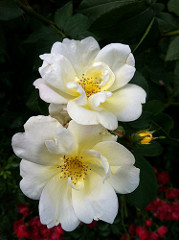

In [9]:
PIL.Image.open(str(roses[0]))
# plt.imshow(cv2.imread(str(roses[0])))     can use this also

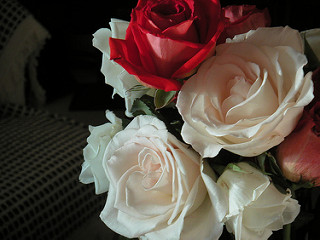

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
tulips = list(data_dir.glob('tulips/*.jpg'))

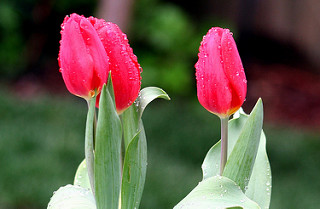

In [12]:
PIL.Image.open(str(tulips[0]))
# plt.imshow(cv2.imread(str(tulips[0])))  

In [13]:
flowers_image_dic = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg'))
}

In [14]:
flowers_image_label = {
    'roses' : 0,
    'tulips' : 1,
    'sunflowers' : 2,
    'dandelion' : 3,
    'daisy' : 4
}

In [15]:
img = cv2.imread(str(flowers_image_dic['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
img.shape

(240, 179, 3)

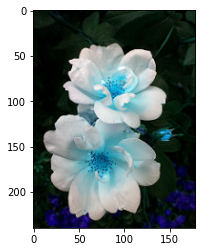

In [17]:
plt.imshow(img)

In [18]:
x = []
y = []

for flower_name,flower_image in flowers_image_dic.items():
    for image in flower_image:
        img = cv2.imread(str(image))
        reshaped_img = cv2.resize(img,(180,180))
        x.append(reshaped_img)
        y.append(flowers_image_label[flower_name])

In [19]:
x = np.array(x)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [21]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [22]:
x_train_scaled.shape

(2936, 180, 180, 3)

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (180,180,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
  keras.layers.Flatten(),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              

In [24]:
model.fit(x_train_scaled, y_train, epochs=5) 

Epoch 1/5


C:\Users\91852\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 31s 331ms/step - loss: 1.3682 - accuracy: 0.4254
Epoch 2/5
92/92 [==============================] - 31s 332ms/step - loss: 1.0027 - accuracy: 0.6097
Epoch 3/5
92/92 [==============================] - 31s 334ms/step - loss: 0.8369 - accuracy: 0.6802
Epoch 4/5
92/92 [==============================] - 31s 335ms/step - loss: 0.6799 - accuracy: 0.7408
Epoch 5/5
92/92 [==============================] - 32s 346ms/step - loss: 0.4784 - accuracy: 0.8280


In [25]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 4s 135ms/step - loss: 1.1680 - accuracy: 0.6172


[1.1679843664169312, 0.6171662211418152]

In [26]:
y_predicted = model.predict(x_test_scaled)

23/23 [==============================] - 2s 74ms/step


In [27]:
y_pred = []
for i in y_predicted:
    y_pred.append(np.argmax(i))

In [28]:
y_pred[:10]

[2, 0, 2, 4, 2, 3, 1, 2, 3, 4]

In [29]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])

In [30]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

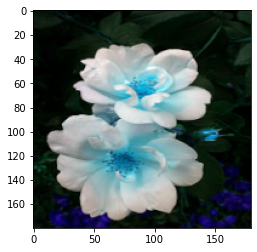

In [31]:
plt.imshow(x[0])

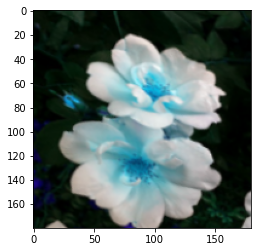

In [32]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [33]:
aug_model = keras.Sequential([
    
  data_augmentation,
    
  keras.layers.Conv2D(16, 3, padding='same', activation='relu',input_shape = (180,180,3)),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Dropout(0.2),
    
  keras.layers.Flatten(),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(5, activation = 'softmax')
])

aug_model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
aug_model.fit(x_train_scaled, y_train, epochs=5)  

Epoch 1/5
92/92 [==============================] - 38s 406ms/step - loss: 1.3344 - accuracy: 0.4421
Epoch 2/5
92/92 [==============================] - 38s 417ms/step - loss: 1.0503 - accuracy: 0.5845
Epoch 3/5
92/92 [==============================] - 38s 417ms/step - loss: 0.9861 - accuracy: 0.6093
Epoch 4/5
92/92 [==============================] - 38s 416ms/step - loss: 0.9206 - accuracy: 0.6417
Epoch 5/5
92/92 [==============================] - 38s 418ms/step - loss: 0.8605 - accuracy: 0.6652


In [35]:
aug_model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 2s 95ms/step - loss: 0.8758 - accuracy: 0.6771


[0.8758034110069275, 0.6771117448806763]

In [36]:
y_predicted_aug = aug_model.predict(x_test_scaled)

23/23 [==============================] - 2s 96ms/step


In [37]:
y_pred_aug = []
for i in y_predicted_aug:
    y_pred_aug.append(np.argmax(i))

In [38]:
y_pred_aug[:10]

[2, 1, 2, 4, 2, 3, 1, 4, 3, 4]

In [39]:
y_test[:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])